In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
%matplotlib inline

In [8]:
# Read the dataset
df = pd.read_csv('supply_chain_data.csv')

#view the first 5 rows of the dataset, can specify amount in the parentheses
df.head(5)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [9]:
#view the info of the Columns of the dataset such as data type and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [10]:
#checking if there are any null values in the dataset.
#isnull function checks if the each row in each column is null and the sum function sums up the amount
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [11]:
#check if there are any duplicated rows of data
df.duplicated().sum()

0

# EDA

Text(0.5, 1.0, 'Product Type')

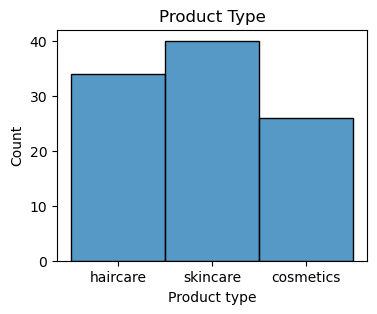

In [12]:
#plotting to see the distrubution of product types
fig = plt.figure(figsize=(4,3))
sns.histplot(data=df,x='Product type')
plt.title('Product Type')

<Axes: xlabel='Price', ylabel='Count'>

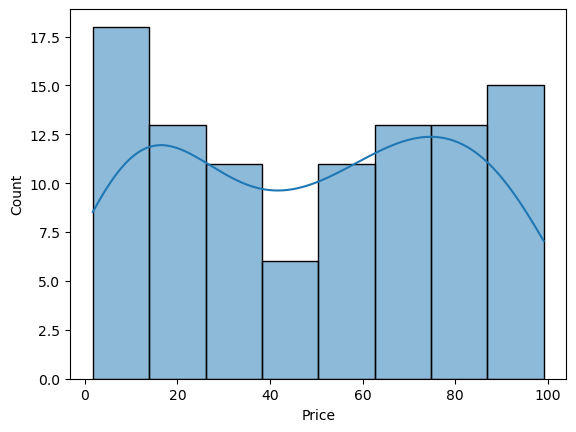

In [13]:
#viewing the histogram of the price column
sns.histplot(data=df,x='Price',kde=True)

<Axes: xlabel='Price', ylabel='Number of products sold'>

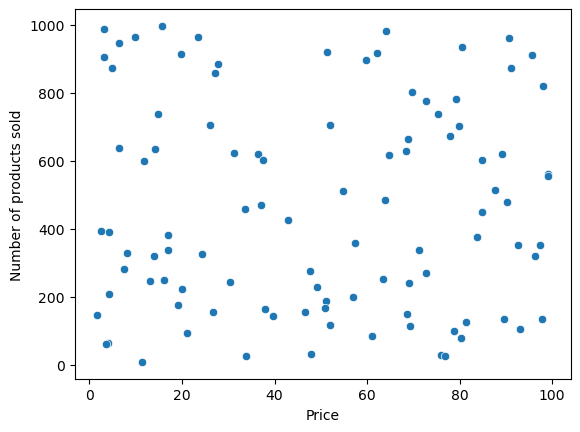

In [14]:
#making a scatter plot of the price and the number of products sold to see if there is a correlation
sns.scatterplot(data=df,x='Price',y='Number of products sold')

In [15]:
#checking the descriptive statistics of the product type based on the price
df.groupby('Product type').describe()['Price']

,count,mean,std,min,25%,50%,75%,max
Product type,,,,,,,,
cosmetics,26.0,57.361058,30.423912,2.397275,44.147347,64.311917,80.821379,97.760086
haircare,34.0,46.014279,28.850845,1.699976,26.796123,48.588874,69.678712,97.446947
skincare,40.0,47.259329,33.337844,4.078333,17.033205,37.228419,82.344926,99.171329


<Axes: xlabel='Price', ylabel='Product type'>

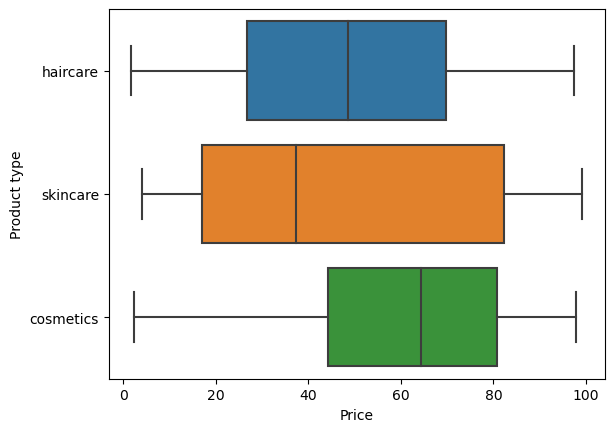

In [16]:
#boxplot of the price and the product type
sns.boxplot(data=df,x='Price',y='Product type')

<Axes: xlabel='Customer demographics', ylabel='Count'>

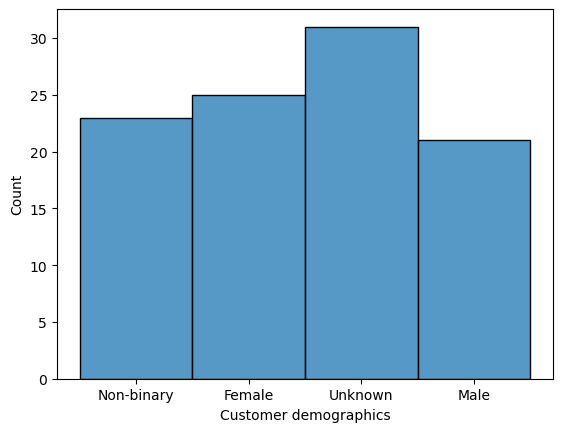

In [17]:
#making histogram of the Customer Demographics to get a representation
sns.histplot(data=df,x='Customer demographics')

<Axes: xlabel='Location', ylabel='Count'>

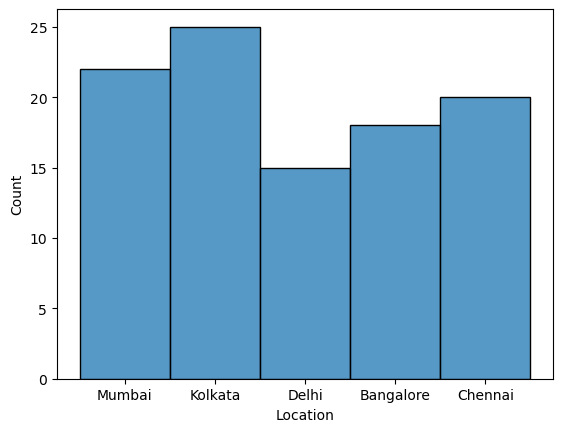

In [18]:
#making histogram of the location of stores
sns.histplot(data=df,x='Location')

Text(0.5, 1.0, 'Price of product type in Locations')

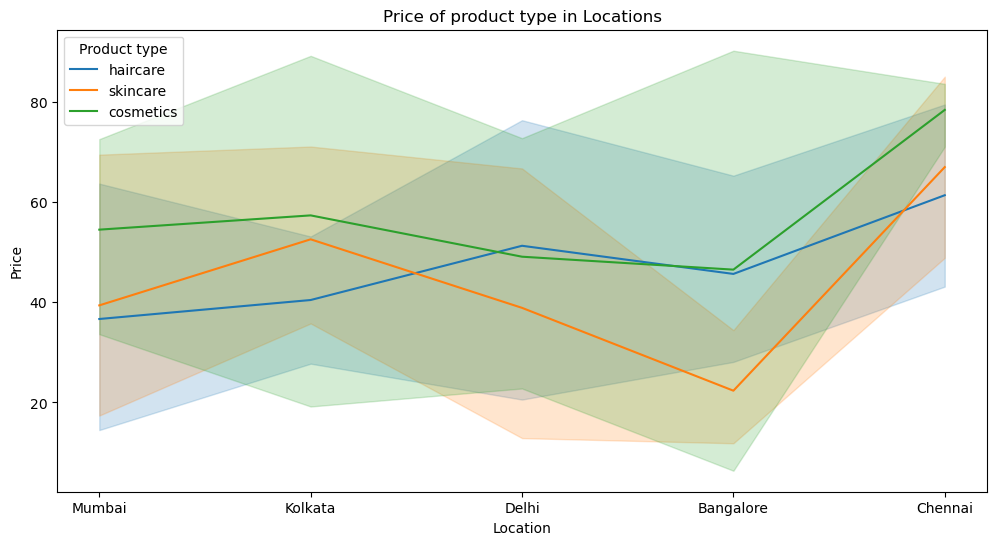

In [19]:
#making a lineplot of the price of each product type at each store location
plt.figure(figsize=(12,6))
sns.lineplot(data=df,y='Price',x='Location',hue='Product type')
plt.title('Price of product type in Locations')

In [20]:
#viewing the data again
df.head(5)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [21]:
#checking the data types of the columns
df.dtypes

Product type                object
SKU                         object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels                 int64
Lead times                   int64
Order quantities             int64
Shipping times               int64
Shipping carriers           object
Shipping costs             float64
Supplier name               object
Location                    object
Lead time                    int64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results          object
Defect rates               float64
Transportation modes        object
Routes                      object
Costs                      float64
dtype: object

In [22]:
#drop the 'SKU' column because it's an id column and isn't useful
df=df.drop('SKU',axis=1)

In [23]:
#make a label encoder
lb = LabelEncoder()

#add the names of columns that have the object data type into an list '[]'
columns = ['Product type','Customer demographics','Shipping carriers','Supplier name','Location','Inspection results','Transportation modes','Routes']

#apply the label encoding to every column of the dataset with the names contained in the list
for c in columns:
  df[c]=lb.fit_transform(df[c])

#check to see if the label encoding is applied successifully
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    int32  
 1   Price                    100 non-null    float64
 2   Availability             100 non-null    int64  
 3   Number of products sold  100 non-null    int64  
 4   Revenue generated        100 non-null    float64
 5   Customer demographics    100 non-null    int32  
 6   Stock levels             100 non-null    int64  
 7   Lead times               100 non-null    int64  
 8   Order quantities         100 non-null    int64  
 9   Shipping times           100 non-null    int64  
 10  Shipping carriers        100 non-null    int32  
 11  Shipping costs           100 non-null    float64
 12  Supplier name            100 non-null    int32  
 13  Location                 100 non-null    int32  
 14  Lead time                10

<Axes: >

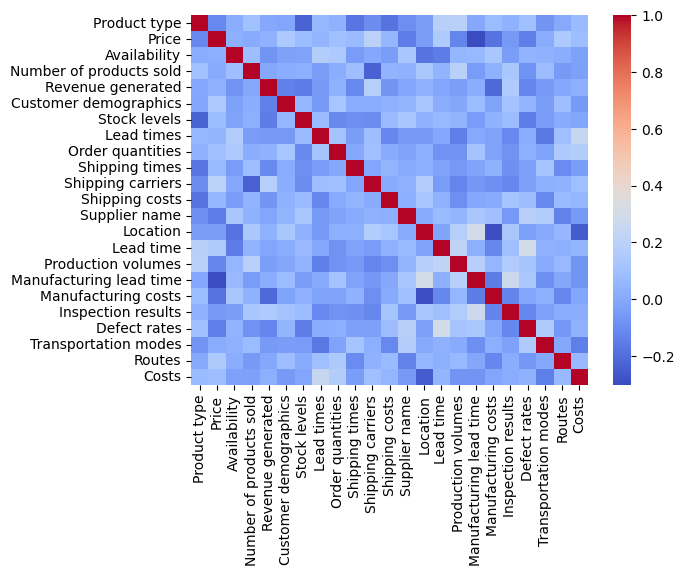

In [24]:
#Create a correlation heatmap
sns.heatmap(df.corr(),cmap='coolwarm')

Text(0.5, 1.0, "The features' correlation to Price ")

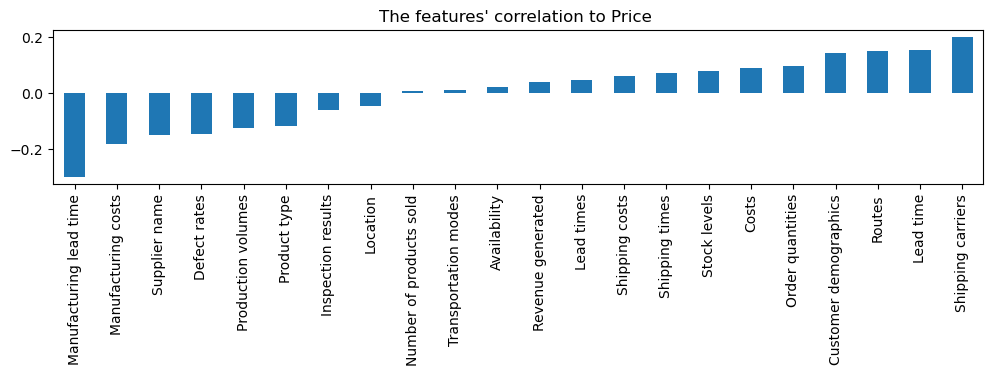

In [25]:
#create a barplot for the features' correlation to the Price column
fig  = plt.figure(figsize=(12,2))
df.corr()['Price'].sort_values()[:-1].plot(kind='bar')
plt.title('The features\' correlation to Price ')

In [26]:
#Separate the Class column 'Price' and the rest of the Dataset
#extracting the values of the dataset using .values to make sure only numeric data is extracted
X=df.drop('Price',axis=1).values
y=df['Price'].values

#split the data into training and testing set with ratio of 80:20
#set the random_state=101 to get the same result as the example
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [27]:
#create an instance of MinMaxScaler and applying it to the X_train and X_test and save it under different name
#This will create a normalized version of the data; the two deep learning model with & without normalization will be compared later
scaler = MinMaxScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [31]:
#check the shape of the input dataset to see how many neurons are needed in the first layer
print('X train shape: ',X_train.shape)
print('X test shape: ',X_test.shape)


X train shape:  (80, 22)
X test shape:  (20, 22)


# MODEL CREATION

In [32]:
#creating a deep learning model
model = Sequential()

#the first layer must match the number of features from the input
model.add(Dense(22,activation='relu'))

#the "hidden" layer can contain any number of neurons and layers
#can adjust the amounts accordingly but make sure to avoid overfitting
#overfitting is training the model perfectly perdict the training dataset but is useless with other unseen data
model.add(Dense(22,activation='relu'))
model.add(Dense(22,activation='relu'))

#for binary classification or in this case regression, the last layer will have one neuron
model.add(Dense(1))

#compile the model - adam optimizer is used, the metrics to keep track is Mean absolute error and the loss metrics is the mean squared error
#for more information about optimizers, metrics and losses, visit the following links:
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
# https://www.tensorflow.org/api_docs/python/tf/keras/metrics
# https://www.tensorflow.org/api_docs/python/tf/keras/losses
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [33]:
#fit the model with unnormalized data and save the model as 'unNormModel'
# batchsize of 128, 400 epoches and add the testing data as the validation data
unNormModel = model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
1/1 [==============================] - 2s 2s/step - loss: 2055681.3750 - mae: 1261.0491 - val_loss: 2232934.7500 - val_mae: 1391.9501
Epoch 2/400
1/1 [==============================] - 0s 65ms/step - loss: 1899563.2500 - mae: 1211.5227 - val_loss: 2064121.6250 - val_mae: 1338.2581
Epoch 3/400
1/1 [==============================] - 0s 68ms/step - loss: 1756918.0000 - mae: 1164.3054 - val_loss: 1905592.0000 - val_mae: 1285.7629
Epoch 4/400
1/1 [==============================] - 0s 63ms/step - loss: 1622612.2500 - mae: 1118.2191 - val_loss: 1755019.3750 - val_mae: 1233.8480
Epoch 5/400
1/1 [==============================] - 0s 76ms/step - loss: 1496034.7500 - mae: 1073.1058 - val_loss: 1611397.6250 - val_mae: 1182.3575
Epoch 6/400
1/1 [==============================] - 0s 66ms/step - loss: 1375775.5000 - mae: 1028.5350 - val_loss: 1475361.5000 - val_mae: 1131.4529
Epoch 7/400
1/1 [==============================] - 0s 69ms/step - loss: 1260894.6250 - mae: 984.1364 - val_loss: 1

1/1 [==============================] - 0s 85ms/step - loss: 2861.3765 - mae: 43.4038 - val_loss: 3048.7280 - val_mae: 46.9499
Epoch 59/400
1/1 [==============================] - 0s 66ms/step - loss: 3058.1719 - mae: 44.7199 - val_loss: 3238.5146 - val_mae: 48.5678
Epoch 60/400
1/1 [==============================] - 0s 60ms/step - loss: 3211.7454 - mae: 45.6764 - val_loss: 3363.5469 - val_mae: 49.6110
Epoch 61/400
1/1 [==============================] - 0s 64ms/step - loss: 3311.3074 - mae: 46.3469 - val_loss: 3420.2085 - val_mae: 50.1021
Epoch 62/400
1/1 [==============================] - 0s 62ms/step - loss: 3355.4915 - mae: 46.6696 - val_loss: 3408.6382 - val_mae: 50.0532
Epoch 63/400
1/1 [==============================] - 0s 66ms/step - loss: 3345.9883 - mae: 46.6282 - val_loss: 3337.1594 - val_mae: 49.5340
Epoch 64/400
1/1 [==============================] - 0s 66ms/step - loss: 3287.4211 - mae: 46.2400 - val_loss: 3214.1633 - val_mae: 48.5970
Epoch 65/400
1/1 [======================

Epoch 117/400
1/1 [==============================] - 0s 120ms/step - loss: 1099.3810 - mae: 28.7453 - val_loss: 983.9796 - val_mae: 27.2117
Epoch 118/400
1/1 [==============================] - 0s 125ms/step - loss: 1095.3464 - mae: 28.6944 - val_loss: 983.8537 - val_mae: 27.2296
Epoch 119/400
1/1 [==============================] - 0s 114ms/step - loss: 1090.5369 - mae: 28.6337 - val_loss: 986.3859 - val_mae: 27.3052
Epoch 120/400
1/1 [==============================] - 0s 66ms/step - loss: 1084.8284 - mae: 28.5687 - val_loss: 991.4636 - val_mae: 27.4384
Epoch 121/400
1/1 [==============================] - 0s 69ms/step - loss: 1078.0906 - mae: 28.4961 - val_loss: 999.0089 - val_mae: 27.6254
Epoch 122/400
1/1 [==============================] - 0s 69ms/step - loss: 1070.6289 - mae: 28.4100 - val_loss: 1008.8870 - val_mae: 27.8586
Epoch 123/400
1/1 [==============================] - 0s 75ms/step - loss: 1062.4822 - mae: 28.3267 - val_loss: 1022.5929 - val_mae: 28.1564
Epoch 124/400
1/1 [===

Epoch 176/400
1/1 [==============================] - 0s 159ms/step - loss: 912.2991 - mae: 26.9096 - val_loss: 1115.1819 - val_mae: 29.9351
Epoch 177/400
1/1 [==============================] - 0s 68ms/step - loss: 910.9910 - mae: 26.8893 - val_loss: 1115.5186 - val_mae: 29.9340
Epoch 178/400
1/1 [==============================] - 0s 50ms/step - loss: 909.7135 - mae: 26.8688 - val_loss: 1115.8362 - val_mae: 29.9327
Epoch 179/400
1/1 [==============================] - 0s 40ms/step - loss: 908.4658 - mae: 26.8483 - val_loss: 1116.2703 - val_mae: 29.9342
Epoch 180/400
1/1 [==============================] - 0s 51ms/step - loss: 907.2653 - mae: 26.8285 - val_loss: 1122.1827 - val_mae: 30.0468
Epoch 181/400
1/1 [==============================] - 0s 93ms/step - loss: 906.0692 - mae: 26.8157 - val_loss: 1126.8190 - val_mae: 30.1329
Epoch 182/400
1/1 [==============================] - 0s 86ms/step - loss: 904.9625 - mae: 26.8015 - val_loss: 1129.4374 - val_mae: 30.1789
Epoch 183/400
1/1 [=======

Epoch 235/400
1/1 [==============================] - 0s 69ms/step - loss: 862.8112 - mae: 26.0289 - val_loss: 1100.7972 - val_mae: 29.7498
Epoch 236/400
1/1 [==============================] - 0s 69ms/step - loss: 862.2996 - mae: 26.0169 - val_loss: 1100.4106 - val_mae: 29.7445
Epoch 237/400
1/1 [==============================] - 0s 67ms/step - loss: 861.7859 - mae: 26.0049 - val_loss: 1099.9781 - val_mae: 29.7388
Epoch 238/400
1/1 [==============================] - 0s 59ms/step - loss: 861.2778 - mae: 25.9928 - val_loss: 1100.0486 - val_mae: 29.7429
Epoch 239/400
1/1 [==============================] - 0s 67ms/step - loss: 860.7853 - mae: 25.9820 - val_loss: 1100.7069 - val_mae: 29.7583
Epoch 240/400
1/1 [==============================] - 0s 63ms/step - loss: 860.2697 - mae: 25.9720 - val_loss: 1102.5334 - val_mae: 29.7958
Epoch 241/400
1/1 [==============================] - 0s 72ms/step - loss: 859.7516 - mae: 25.9641 - val_loss: 1104.2122 - val_mae: 29.8299
Epoch 242/400
1/1 [========

Epoch 294/400
1/1 [==============================] - 0s 112ms/step - loss: 828.8444 - mae: 25.4188 - val_loss: 1100.2732 - val_mae: 29.8074
Epoch 295/400
1/1 [==============================] - 0s 105ms/step - loss: 828.5519 - mae: 25.4127 - val_loss: 1101.8444 - val_mae: 29.8416
Epoch 296/400
1/1 [==============================] - 0s 105ms/step - loss: 827.9905 - mae: 25.4110 - val_loss: 1108.0691 - val_mae: 29.9647
Epoch 297/400
1/1 [==============================] - 0s 108ms/step - loss: 827.3785 - mae: 25.4141 - val_loss: 1109.3230 - val_mae: 29.9912
Epoch 298/400
1/1 [==============================] - 0s 115ms/step - loss: 826.7445 - mae: 25.4087 - val_loss: 1105.7648 - val_mae: 29.9275
Epoch 299/400
1/1 [==============================] - 0s 207ms/step - loss: 826.0754 - mae: 25.3958 - val_loss: 1106.5413 - val_mae: 29.9455
Epoch 300/400
1/1 [==============================] - 0s 130ms/step - loss: 825.5150 - mae: 25.3899 - val_loss: 1111.0874 - val_mae: 30.0319
Epoch 301/400
1/1 [=

Epoch 353/400
1/1 [==============================] - 0s 47ms/step - loss: 795.3096 - mae: 24.9205 - val_loss: 1115.2175 - val_mae: 29.9870
Epoch 354/400
1/1 [==============================] - 0s 46ms/step - loss: 795.1308 - mae: 24.9208 - val_loss: 1111.9919 - val_mae: 29.9253
Epoch 355/400
1/1 [==============================] - 0s 40ms/step - loss: 794.4269 - mae: 24.9040 - val_loss: 1107.4117 - val_mae: 29.8369
Epoch 356/400
1/1 [==============================] - 0s 43ms/step - loss: 793.8824 - mae: 24.8843 - val_loss: 1102.4641 - val_mae: 29.7403
Epoch 357/400
1/1 [==============================] - 0s 39ms/step - loss: 793.7306 - mae: 24.8674 - val_loss: 1102.7648 - val_mae: 29.7423
Epoch 358/400
1/1 [==============================] - 0s 39ms/step - loss: 793.2752 - mae: 24.8585 - val_loss: 1107.6794 - val_mae: 29.8316
Epoch 359/400
1/1 [==============================] - 0s 43ms/step - loss: 792.6621 - mae: 24.8575 - val_loss: 1110.8701 - val_mae: 29.8893
Epoch 360/400
1/1 [========

<Axes: >

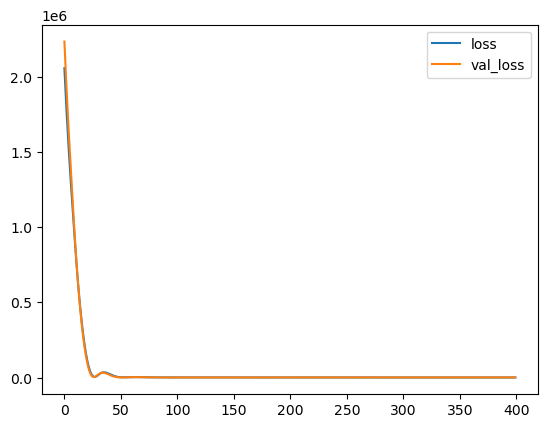

In [34]:
#The validation loss and the actual loss are practically the same as seen in the graph
#shows the deep learning model doesn't have a overfitting problem and should work well with unseen data
losses = {'loss':unNormModel.model.history.history['loss'],'val_loss':unNormModel.model.history.history['val_loss']}
losses = pd.DataFrame(losses)
losses.plot()

<Axes: >

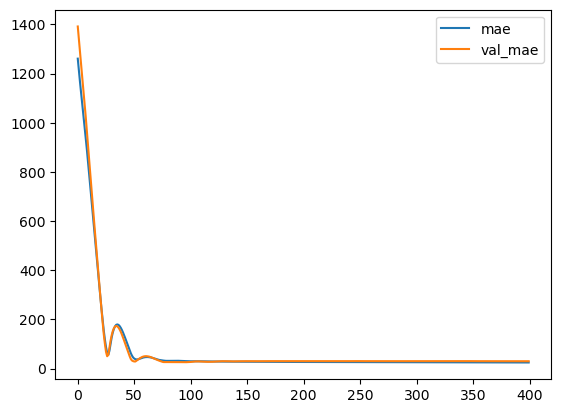

In [35]:
#plot how the model improved its Mean Absolute Error during the model fitting
mae = {'mae':unNormModel.model.history.history['mae'],'val_mae':unNormModel.model.history.history['val_mae']}
mae = pd.DataFrame(mae)
mae.plot()

In [36]:
#Predict the prices using the model
yPreds = model.predict(X_test)

#output the evalation metrics using the predicted price and the actual price(ytest)
# mean absolute error,  mean squared error, root mean squared error and r2 square
print('Evauation metrics of model with unnormalized data ')
print('MAE: %.03f'%mean_absolute_error(y_test,yPreds))
print('MSE: %.03f'%mean_squared_error(y_test,yPreds))
print('RMSE: %.03f'%np.sqrt(mean_squared_error(y_test,yPreds)))
print('R2 score: %.03f'%explained_variance_score(y_test,yPreds))

1/1 [==============================] - 0s 190ms/step
Evauation metrics of model with unnormalized data 
MAE: 29.580
MSE: 1097.697
RMSE: 33.132
R2 score: -0.030


In [37]:
##define a new model again with the same specs as before
model = Sequential()

model.add(Dense(22,activation='relu'))

model.add(Dense(22,activation='relu'))
model.add(Dense(22,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse',metrics=['mae'])

#fit the new model with normalized training and testing data and save the model as 'normModel'
normModel = model.fit(x=X_train_norm,y=y_train,
          validation_data=(X_test_norm,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
1/1 [==============================] - 2s 2s/step - loss: 3523.5356 - mae: 50.9506 - val_loss: 2945.5872 - val_mae: 43.5145
Epoch 2/400
1/1 [==============================] - 0s 84ms/step - loss: 3519.9429 - mae: 50.9152 - val_loss: 2942.5200 - val_mae: 43.4806
Epoch 3/400
1/1 [==============================] - 0s 88ms/step - loss: 3516.3235 - mae: 50.8793 - val_loss: 2939.4722 - val_mae: 43.4463
Epoch 4/400
1/1 [==============================] - 0s 107ms/step - loss: 3512.6340 - mae: 50.8426 - val_loss: 2936.4961 - val_mae: 43.4123
Epoch 5/400
1/1 [==============================] - 0s 110ms/step - loss: 3508.8398 - mae: 50.8052 - val_loss: 2933.4727 - val_mae: 43.3774
Epoch 6/400
1/1 [==============================] - 0s 121ms/step - loss: 3504.9741 - mae: 50.7670 - val_loss: 2930.1438 - val_mae: 43.3407
Epoch 7/400
1/1 [==============================] - 0s 110ms/step - loss: 3501.0339 - mae: 50.7279 - val_loss: 2926.7764 - val_mae: 43.3038
Epoch 8/400
1/1 [===============

Epoch 60/400
1/1 [==============================] - 0s 64ms/step - loss: 2914.7520 - mae: 45.0262 - val_loss: 2415.4995 - val_mae: 37.3413
Epoch 61/400
1/1 [==============================] - 0s 65ms/step - loss: 2888.2261 - mae: 44.7888 - val_loss: 2392.3052 - val_mae: 37.0834
Epoch 62/400
1/1 [==============================] - 0s 65ms/step - loss: 2860.8101 - mae: 44.5448 - val_loss: 2368.3794 - val_mae: 36.8151
Epoch 63/400
1/1 [==============================] - 0s 67ms/step - loss: 2832.5259 - mae: 44.2911 - val_loss: 2343.6997 - val_mae: 36.5360
Epoch 64/400
1/1 [==============================] - 0s 63ms/step - loss: 2803.3286 - mae: 44.0273 - val_loss: 2318.2346 - val_mae: 36.2455
Epoch 65/400
1/1 [==============================] - 0s 61ms/step - loss: 2773.1667 - mae: 43.7595 - val_loss: 2292.0349 - val_mae: 35.9437
Epoch 66/400
1/1 [==============================] - 0s 62ms/step - loss: 2742.0132 - mae: 43.4806 - val_loss: 2265.0977 - val_mae: 35.6300
Epoch 67/400
1/1 [=========

Epoch 119/400
1/1 [==============================] - 0s 45ms/step - loss: 999.8052 - mae: 27.3797 - val_loss: 1092.8418 - val_mae: 29.7031
Epoch 120/400
1/1 [==============================] - 0s 44ms/step - loss: 1000.4854 - mae: 27.3481 - val_loss: 1099.9348 - val_mae: 29.7999
Epoch 121/400
1/1 [==============================] - 0s 41ms/step - loss: 1001.5348 - mae: 27.3279 - val_loss: 1106.3718 - val_mae: 29.8822
Epoch 122/400
1/1 [==============================] - 0s 46ms/step - loss: 1002.7467 - mae: 27.3092 - val_loss: 1111.9795 - val_mae: 29.9501
Epoch 123/400
1/1 [==============================] - 0s 42ms/step - loss: 1003.9564 - mae: 27.3013 - val_loss: 1116.6306 - val_mae: 30.0038
Epoch 124/400
1/1 [==============================] - 0s 41ms/step - loss: 1005.0225 - mae: 27.3029 - val_loss: 1120.2416 - val_mae: 30.0436
Epoch 125/400
1/1 [==============================] - 0s 48ms/step - loss: 1005.8381 - mae: 27.3024 - val_loss: 1122.7740 - val_mae: 30.0702
Epoch 126/400
1/1 [==

Epoch 178/400
1/1 [==============================] - 0s 105ms/step - loss: 959.8021 - mae: 26.9308 - val_loss: 1040.4624 - val_mae: 28.8882
Epoch 179/400
1/1 [==============================] - 0s 80ms/step - loss: 959.0541 - mae: 26.9191 - val_loss: 1040.1023 - val_mae: 28.8823
Epoch 180/400
1/1 [==============================] - 0s 72ms/step - loss: 958.3041 - mae: 26.9076 - val_loss: 1039.7092 - val_mae: 28.8759
Epoch 181/400
1/1 [==============================] - 0s 80ms/step - loss: 957.5529 - mae: 26.8963 - val_loss: 1039.2834 - val_mae: 28.8688
Epoch 182/400
1/1 [==============================] - 0s 75ms/step - loss: 956.7985 - mae: 26.8851 - val_loss: 1038.8176 - val_mae: 28.8609
Epoch 183/400
1/1 [==============================] - 0s 111ms/step - loss: 956.0477 - mae: 26.8743 - val_loss: 1038.3077 - val_mae: 28.8524
Epoch 184/400
1/1 [==============================] - 0s 100ms/step - loss: 955.2946 - mae: 26.8636 - val_loss: 1037.7620 - val_mae: 28.8432
Epoch 185/400
1/1 [=====

Epoch 237/400
1/1 [==============================] - 0s 86ms/step - loss: 912.6102 - mae: 26.3286 - val_loss: 999.8527 - val_mae: 28.1848
Epoch 238/400
1/1 [==============================] - 0s 83ms/step - loss: 911.7426 - mae: 26.3174 - val_loss: 999.0705 - val_mae: 28.1708
Epoch 239/400
1/1 [==============================] - 0s 81ms/step - loss: 910.8824 - mae: 26.3064 - val_loss: 998.2953 - val_mae: 28.1568
Epoch 240/400
1/1 [==============================] - 0s 80ms/step - loss: 910.0209 - mae: 26.2955 - val_loss: 997.5482 - val_mae: 28.1432
Epoch 241/400
1/1 [==============================] - 0s 58ms/step - loss: 909.1478 - mae: 26.2841 - val_loss: 996.8486 - val_mae: 28.1299
Epoch 242/400
1/1 [==============================] - 0s 62ms/step - loss: 908.2490 - mae: 26.2721 - val_loss: 996.1683 - val_mae: 28.1168
Epoch 243/400
1/1 [==============================] - 0s 61ms/step - loss: 907.3469 - mae: 26.2601 - val_loss: 995.4816 - val_mae: 28.1037
Epoch 244/400
1/1 [===============

1/1 [==============================] - 0s 50ms/step - loss: 855.5273 - mae: 25.5442 - val_loss: 956.3820 - val_mae: 27.2891
Epoch 297/400
1/1 [==============================] - 0s 45ms/step - loss: 854.4904 - mae: 25.5290 - val_loss: 955.5914 - val_mae: 27.2721
Epoch 298/400
1/1 [==============================] - 0s 58ms/step - loss: 853.4465 - mae: 25.5139 - val_loss: 954.8205 - val_mae: 27.2552
Epoch 299/400
1/1 [==============================] - 0s 62ms/step - loss: 852.4167 - mae: 25.4987 - val_loss: 954.1182 - val_mae: 27.2390
Epoch 300/400
1/1 [==============================] - 0s 60ms/step - loss: 851.3672 - mae: 25.4828 - val_loss: 953.4860 - val_mae: 27.2234
Epoch 301/400
1/1 [==============================] - 0s 60ms/step - loss: 850.3143 - mae: 25.4668 - val_loss: 952.8652 - val_mae: 27.2078
Epoch 302/400
1/1 [==============================] - 0s 58ms/step - loss: 849.2756 - mae: 25.4514 - val_loss: 952.1818 - val_mae: 27.1915
Epoch 303/400
1/1 [=============================

1/1 [==============================] - 0s 82ms/step - loss: 789.4784 - mae: 24.5094 - val_loss: 911.7523 - val_mae: 26.1768
Epoch 356/400
1/1 [==============================] - 0s 75ms/step - loss: 788.3093 - mae: 24.4880 - val_loss: 910.8830 - val_mae: 26.1542
Epoch 357/400
1/1 [==============================] - 0s 64ms/step - loss: 787.1198 - mae: 24.4676 - val_loss: 910.0292 - val_mae: 26.1314
Epoch 358/400
1/1 [==============================] - 0s 67ms/step - loss: 785.9316 - mae: 24.4482 - val_loss: 909.1937 - val_mae: 26.1087
Epoch 359/400
1/1 [==============================] - 0s 67ms/step - loss: 784.7620 - mae: 24.4290 - val_loss: 908.3519 - val_mae: 26.0857
Epoch 360/400
1/1 [==============================] - 0s 66ms/step - loss: 783.5897 - mae: 24.4092 - val_loss: 907.4498 - val_mae: 26.0618
Epoch 361/400
1/1 [==============================] - 0s 62ms/step - loss: 782.4002 - mae: 24.3884 - val_loss: 906.5433 - val_mae: 26.0384
Epoch 362/400
1/1 [=============================

<Axes: >

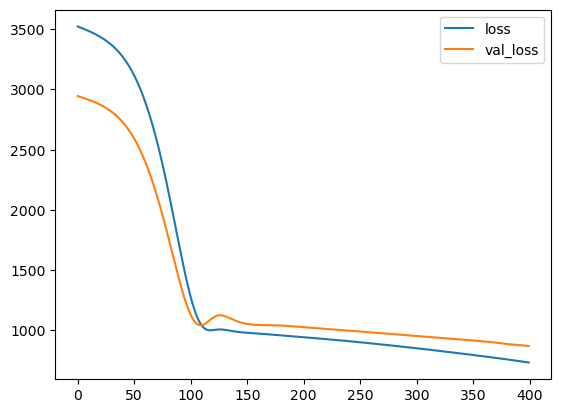

In [38]:
#The validation loss and the actual loss are practically the same as seen in the graph
#shows the deep learning model doesn't have a overfitting problem and should work well with unseen data
losses = {'loss':normModel.model.history.history['loss'],'val_loss':normModel.model.history.history['val_loss']}
losses = pd.DataFrame(losses)
losses.plot()

<Axes: >

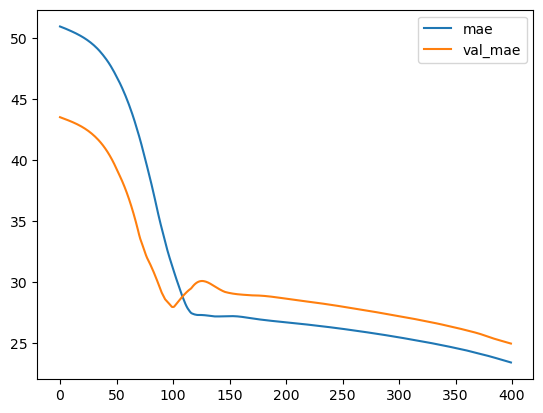

In [39]:
#plot how the model improved its Mean Absolute Error during the model fitting
mae = {'mae':normModel.model.history.history['mae'],'val_mae':normModel.model.history.history['val_mae']}
mae = pd.DataFrame(mae)
mae.plot()

In [40]:
#predict the prices again using the new model
yNormPreds = model.predict(X_test_norm)

#evaluation metrics for the new model
print('Evaluation metrics of model with normalized data')
print('MAE: %.03f'%mean_absolute_error(y_test,yNormPreds))
print('MSE: %.03f'%mean_squared_error(y_test,yNormPreds))
print('RMSE: %.03f'%np.sqrt(mean_squared_error(y_test,yNormPreds)))
print('R2 score: %.03f'%explained_variance_score(y_test,yNormPreds))

1/1 [==============================] - 0s 115ms/step
Evaluation metrics of model with normalized data
MAE: 24.959
MSE: 869.500
RMSE: 29.487
R2 score: 0.185


Text(0, 0.5, 'Predicted price')

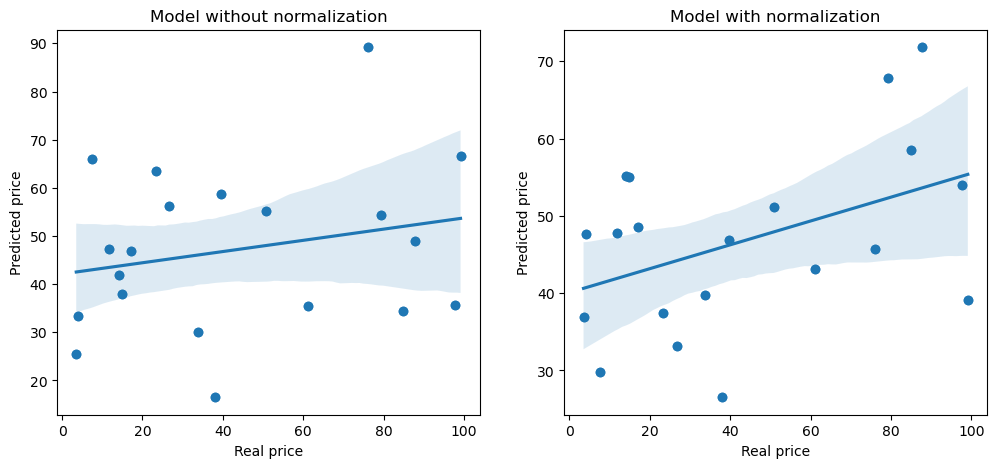

In [41]:
#make scatter plots of the predicted price and the actual price for both models
#make a regplot to see the linear regression model fit (just for visualization)
fig = plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_test,yPreds)
plt.title('Model without normalization')
sns.regplot(x=y_test,y=yPreds)
plt.xlabel('Real price')
plt.ylabel('Predicted price')

plt.subplot(1,2,2)
plt.scatter(y_test,yNormPreds)
sns.regplot(x=y_test,y=yNormPreds)
plt.title('Model with normalization')
plt.xlabel('Real price')
plt.ylabel('Predicted price')



# Conclusion

Model with Normalized data performed better than the model with unnormalized data. It was able to explain 12% of the predictions with an R2-score of 0.129 but the other model had a R2 score which meant it couldn't explain any of its predictions.

    Model with normalization

    MAE: 26.290
    MSE: 940.151
    RMSE: 30.662
    R2 score: 0.129

    Model without Normalization

    MAE: 34.008
    MSE: 1482.000
    RMSE: 38.497
    R2 score: -0.397

The model with normalization had a better linear regression model fit which shows better correlation between predicted prices and actual prices
